In [47]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from tensorflow.python.ops.numpy_ops.np_array_ops import hsplit

In [48]:
#Data processing and cleaning
cols=[
    'fLength',
    'fWidth',
    'fSize',
    'fConc',
    'fConc1',
    'fAsym',
    'fM3Long',
    'fM3Trans',
    'fAlpha',
    'fDist',
    'class'
]
df=pd.read_csv('magic04.data', names=cols)
df["class"]=(df["class"]=="g").astype(int)
print(df.head())

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1  


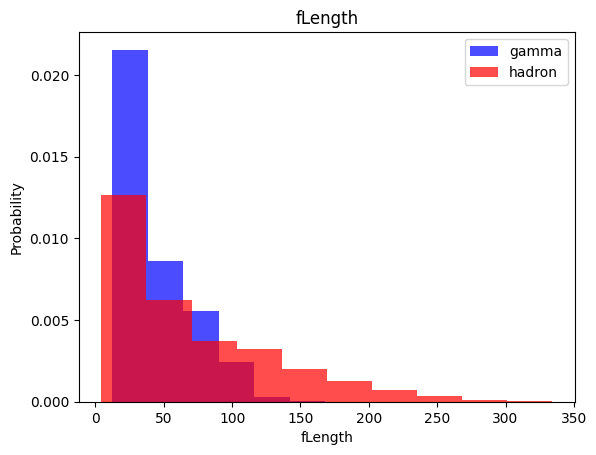

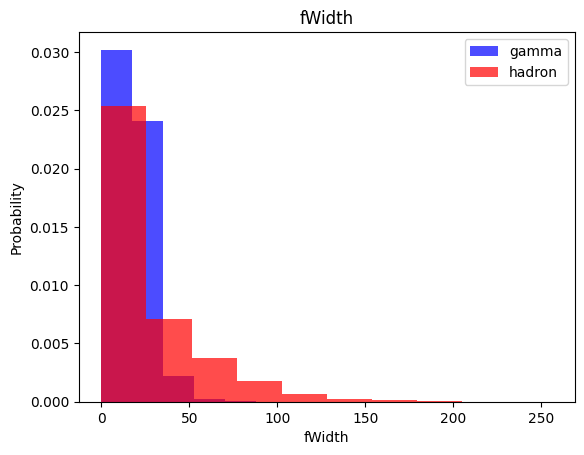

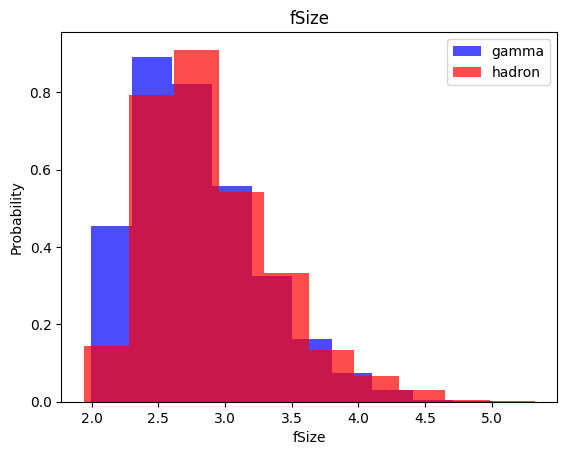

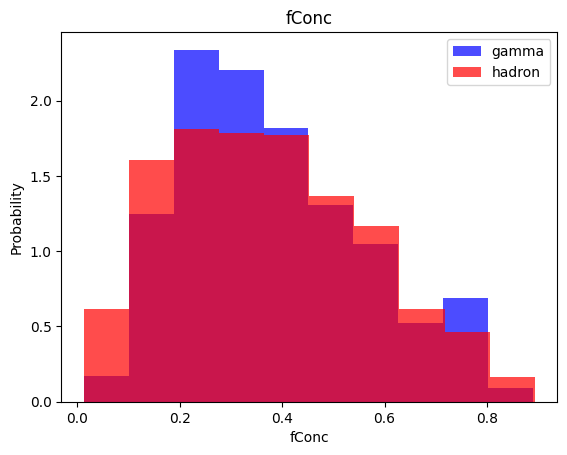

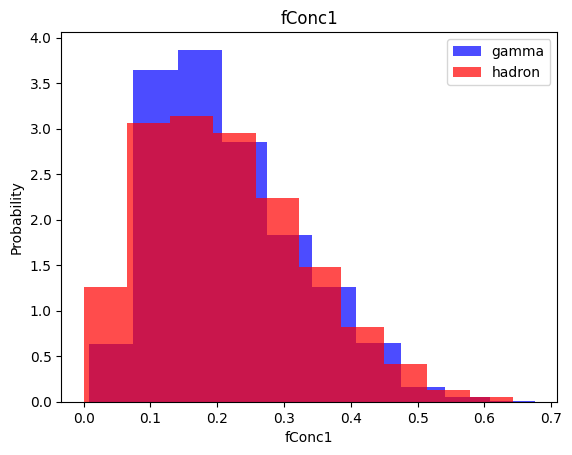

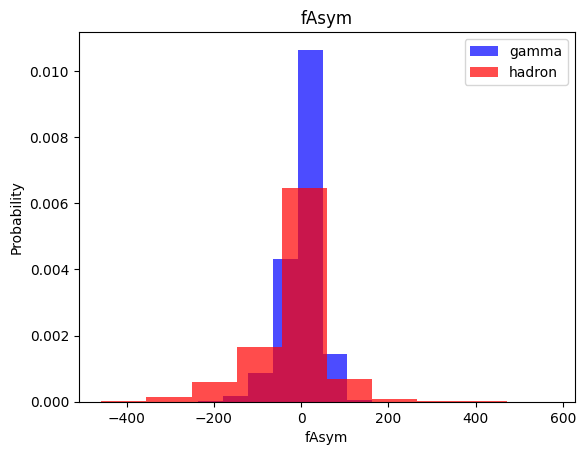

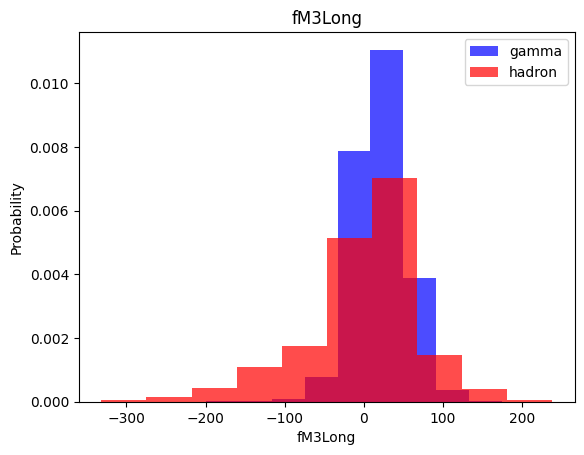

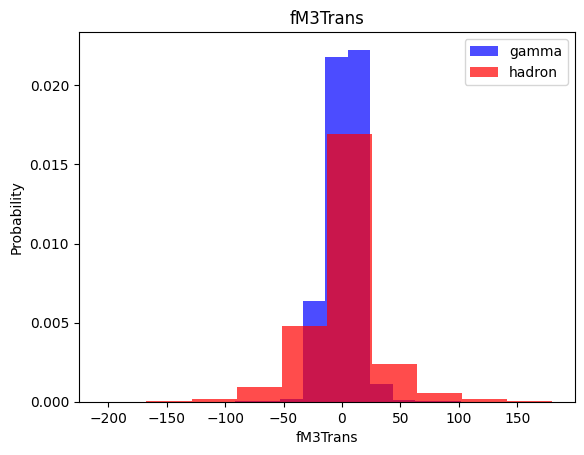

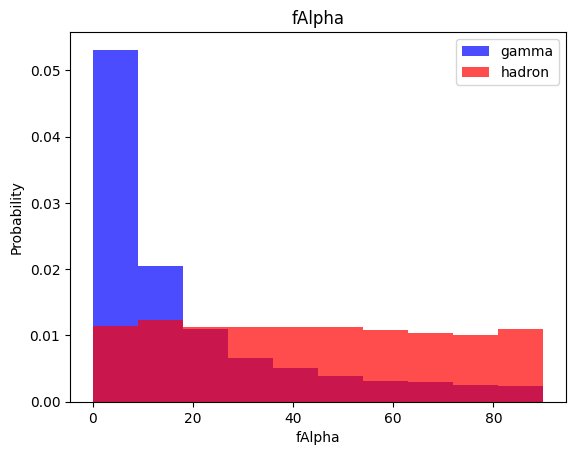

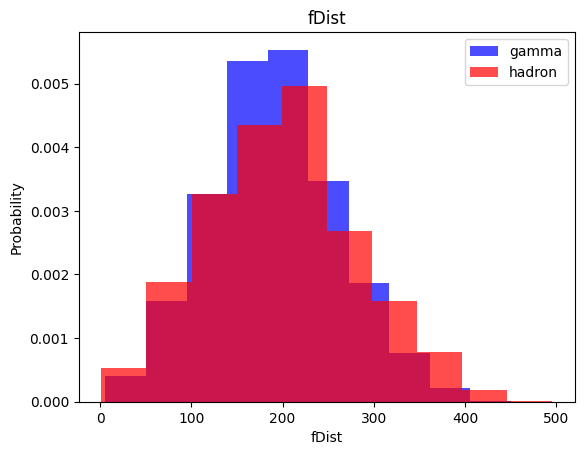

In [49]:
#finding relationship between features and classes
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df["class"]==0][label],color='red',label='hadron',alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [50]:
#Setting up validation, testing and training data sets
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/home/azzaro/Desktop/kunk/Telescope/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [51]:
#Scaling the datasets
def scale_dataset(dataframe,oversample=False):
    #getting the values from the dataframes
    X=dataframe[dataframe.columns[:-1]].values
    y=dataframe[dataframe.columns[-1]].values

    #importing the standard scaler
    scaler=StandardScaler()
    X=scaler.fit_transform(X)

    #Gammas Datasets supercedes Hadron datasets
    #Add a random sampler to match the number of datasets
    if oversample:
        ros=RandomOverSampler()
        X,y=ros.fit_resample(X,y)

    #merging scaled data as data and reshaping y into a 2d array
    data=np.hstack((X,np.reshape(y,(-1,1))))

    return data,X,y

In [52]:
#Loading datasets
train, X_train, y_train=scale_dataset(train,oversample=True)
valid, X_valid, y_valid=scale_dataset(valid,oversample=False)
test, X_test, y_test=scale_dataset(test,oversample=False)

In [53]:
#Training using KNN
knn_model=KNeighborsClassifier(n_neighbors=5)
#fit the values into the models
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)

In [54]:
print("Results from KNN training")
print(classification_report(y_test,y_pred))

Results from KNN training
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1349
           1       0.85      0.86      0.86      2455

    accuracy                           0.81      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.81      0.81      0.81      3804



In [55]:
#Naives Bayes Implmentation
nb_model=GaussianNB()
nb_model=nb_model.fit(X_train,y_train)
y_pred=nb_model.predict(X_test)
print("Results from Naive Bayes training")
print(classification_report(y_test,y_pred))

Results from Naive Bayes training
              precision    recall  f1-score   support

           0       0.67      0.41      0.51      1349
           1       0.73      0.89      0.80      2455

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



In [56]:
#Logistic Regression Implementation
lg_model=LogisticRegression()
lg_model=lg_model.fit(X_train,y_train)
y_pred=lg_model.predict(X_test)
print("Results from Logistic Regression training")
print(classification_report(y_test,y_pred))

Results from Logistic Regression training
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1349
           1       0.83      0.82      0.83      2455

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



In [57]:
#Support Vector Machine Implementation
svm_model=SVC()
svm_model=svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
print("Results from SVM training")
print(classification_report(y_test,y_pred))

Results from SVM training
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1349
           1       0.89      0.89      0.89      2455

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



In [58]:
#Plotting losses over epochs
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


In [59]:
#Creating CNN using tensorflow
nn_model=tf.keras.Sequential([
    #Input Layer
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    #Hidden Layer
    tf.keras.layers.Dense(32, activation='relu'),
    #Output Layer
    tf.keras.layers.Dense(1, activation='sigmoid'),
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])
history=nn_model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/100


/home/azzaro/Desktop/kunk/Telescope/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7982 - loss: 0.4458 - val_accuracy: 0.6670 - val_loss: 0.5802
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.8431 - loss: 0.3717 - val_accuracy: 0.7352 - val_loss: 0.5270
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.8534 - loss: 0.3550 - val_accuracy: 0.7591 - val_loss: 0.4730
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.8554 - loss: 0.3455 - val_accuracy: 0.7483 - val_loss: 0.5008
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.8591 - loss: 0.3393 - val_accuracy: 0.7210 - val_loss: 0.5561
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.8610 - loss: 0.3347 - val_accuracy: 0.7476 - val_loss: 0.4978
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.8610 - loss: 0.3297 - val_accuracy: 0.7702 - val_loss: 0.4611
Epoch 8/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.8638 - loss: 0.3252 - val_ac

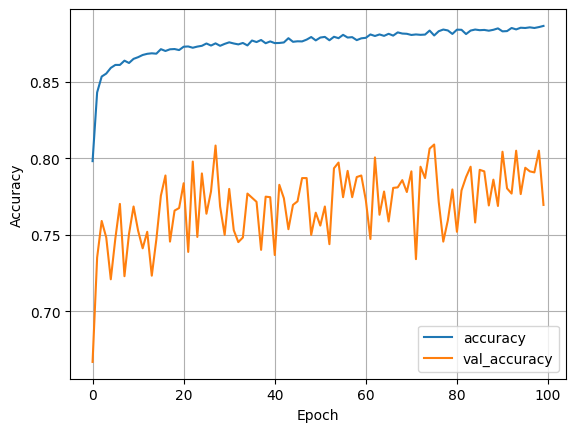

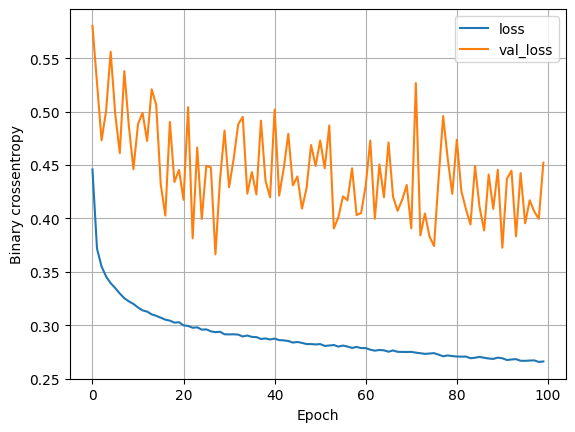

In [60]:
plot_accuracy(history)
plot_loss(history)